In [71]:
import pandas as pd
import numpy as no
import scipy.stats as stats
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from scipy.stats import skew,binom,zscore,shapiro



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [51]:
df = pd.read_csv('diabetes.csv')

In [52]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [55]:
df.dropna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [56]:
shapiro =  stats.shapiro(df['Glucose'])

In [57]:
shapiro.pvalue

1.9863474999979633e-11

In [58]:
if shapiro.pvalue < 0.05:
    print("No normal distribution")
else:
    print("yes")

No normal distribution


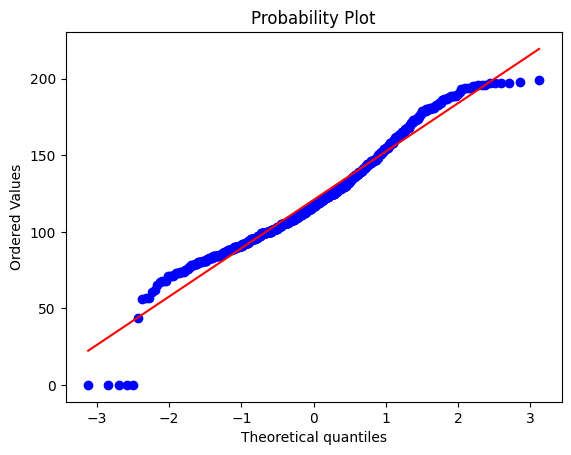

In [59]:
stats.probplot(df['Glucose'],dist='norm',plot=plt)
plt.show()

In [60]:
sample_means = []
n = 100
s = 30

In [61]:
for i in range(n):
    sample = df['Glucose'].sample(s)
    sample_means.append(sample.mean())

In [62]:
shapiro =  stats.shapiro(sample_means)

In [63]:
if shapiro.pvalue < 0.05:
    print("No normal distribution")
else:
    print("yes")

yes


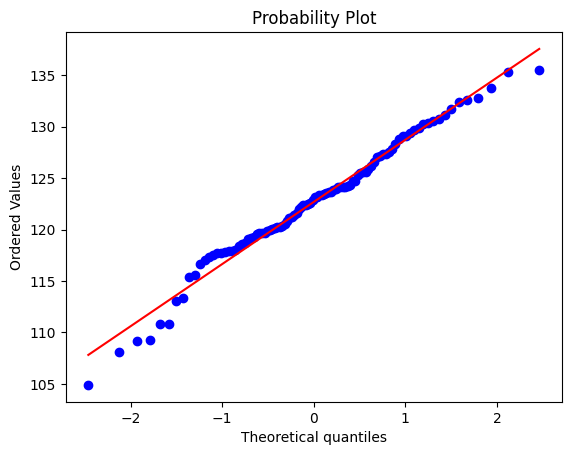

In [64]:
stats.probplot(sample_means,dist='norm',plot=plt)
plt.show()

<Axes: ylabel='Count'>

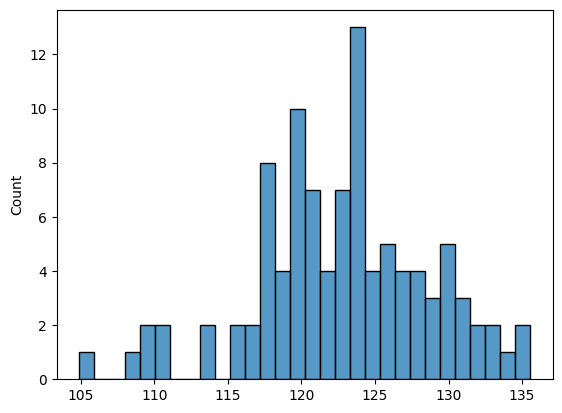

In [65]:
sns.histplot(sample_means,bins=30)

In [106]:
#regression

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


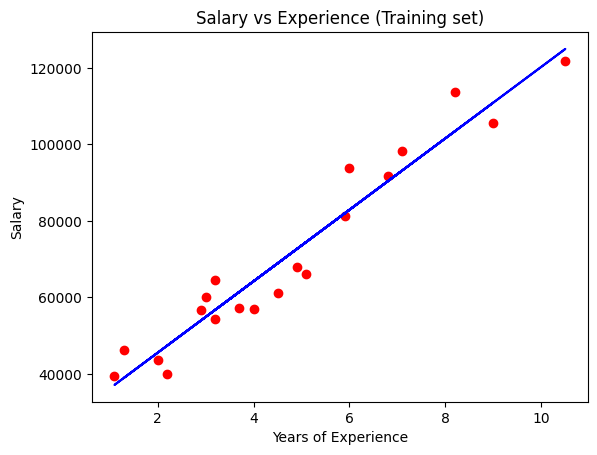

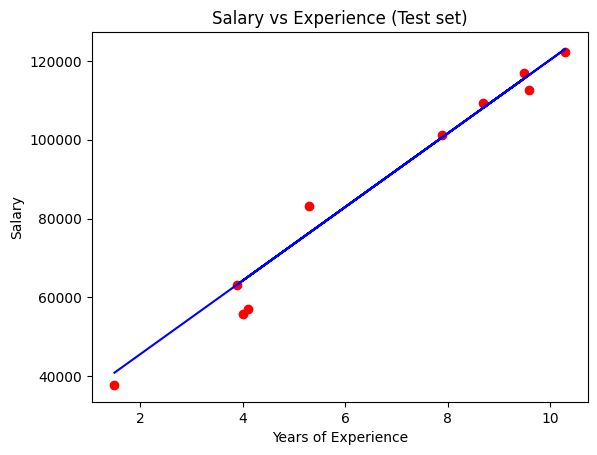

The predicted salary of a person with 15 years experience is  [167005.32889087]
Object `offer` not found.
Intercept ... Fresher Salary:  26816.19224403119
Coefficient ... Additional Salary for Each Additional Year's Experience:  [9345.94244312]
MAE = 3426.4269374307123
MSE = 21026037.329511296
RMSE = 4585.4157204675885


In [186]:
import pandas as pd
df = pd.read_csv('salary.csv')

X = df.drop('Salary', axis=1).values  

y = df['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print (y_pred)

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, color = 'red')

plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color = 'red')

plt.plot(X_test, regressor.predict(X_test), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

new_salary_pred = regressor.predict([[15]])
print('The predicted salary of a person with 15 years experience is ',new_salary_pred)

salary will we offer?
print("Intercept ... Fresher Salary: ", regressor.intercept_)
print("Coefficient ... Additional Salary for Each Additional Year's Experience: ", regressor.coef_)


from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f"MAE = {MAE}") 

print(f"MSE = {MSE}")

print(f"RMSE = {RMSE}")




In [187]:
#one sample T test

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
age_data = data['Age']
age_data

In [ ]:
pop_avg_age = 40

In [ ]:
t_statistic, p_value = stats.ttest_1samp(age_data, pop_avg_age)
degrees_of_freedom = len(age_data) - 1

In [ ]:
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)

In [ ]:
#Interpretation
alpha = 0.025
if p_value <alpha:
    print("The null hypothesis (mean age =40) is rejected.")
else:
    print("The null hypothesis (mean age = 40) cannot be rejected.")

In [ ]:
critical_value = stats.t.ppf(1- alpha, degrees_of_freedom)
print("Critical value: ", critical_value)

In [ ]:
critical_value = stats.t.ppf(1- alpha, degrees_of_freedom)
print("Critical value: ", critical_value)

In [ ]:
#Two-tailed t-test (Because we are just checking if sample mean = population mean)
#So, we need to take absolute value of t-statistic
if (abs(t_statistic)< critical_value):
    print("The null hypothesis (mean age = 40) cannot be rejected.")
else:
    print("The null hypothesis (mean age = 40) is rejected.")
    

In [ ]:
#Independence test 

In [ ]:
data = pd.read_csv('Mall_Customers.csv')
data

In [ ]:
male_spending = data[data['Genre']=='Male']['Spending Score (1-100)']

In [ ]:
female_spending = data[data['Genre']=='Female']['Spending Score (1-100)']

In [ ]:
t_statistics,p_value = stats.ttest_ind(male_spending,female_spending)

In [ ]:
n_male = len(male_spending)
n_female = len(female_spending)

In [ ]:
degree_of_freedom = n_male + n_female  - 2

In [ ]:
alpha = 0.025

In [ ]:
critical_value = stats.t.ppf(1-alpha,degree_of_freedom)

In [ ]:
print("T-statics : ",t_statistics)
print("P-value : ",p_value)
print("Degree of Freedom : ",degree_of_freedom)

In [ ]:
if p_value < alpha:
    print("There is significant  differnce in spending score between male and female groups")
else:
    print("There is no significant  differnce in spending score between male and female groups")

In [ ]:
if abs(t_statistics) > critical_value:
    print("There is significant  differnce in spending score between male and female groups")
else:
    print("There is no significant  differnce in spending score between male and female groups")
    s

In [ ]:
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Sample data
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = np.dot(X, np.array([1, 2])) + 3

# # Create a linear regression model
# model = LinearRegression().fit(X, y)

# # Print the coefficients
# print("Coefficients:", model.coef_)
# print("Intercept:", model.intercept_)

# # Predict a new value
# new_data = np.array([[3, 5]])
# prediction = model.predict(new_data)
# print("Prediction for new data:", prediction)


In [ ]:
# print("Male Percentage : {:.2f} ".format(male_percent))
# print("Feale Percentage : {:.2f}".format(female_percent))
# print("Other Percentage : {:.2f}".format(other_percent))


In [ ]:
df.drop_duplicates(subset=['col'])

In [ ]:
df.rename(columns= {'old':'new'})

In [ ]:
df['col']= df['col'].str.strip()

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data['column1'].corr(data['column2']

In [ ]:
LOGISTIC REGRESSION

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv("titanic-tested.csv")

# Select desired columns
selected_columns = ["Survived", "Pclass", "Gender", "Age", "SibSp", "Parch", "Embarked"]
df = df[selected_columns]

# Separate features and label
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
categorical_features = ["Pclass", "Gender", "SibSp", "Parch", "Embarked"]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_train = encoder.fit_transform(X_train[categorical_features])
encoded_test = encoder.transform(X_test[categorical_features])

# Combine encoded features with numerical features (Age)
X_train = pd.concat([X_train.drop(categorical_features, axis=1), pd.DataFrame(encoded_train)], axis=1)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), pd.DataFrame(encoded_test)], axis=1)

print(X_train.columns)

# Check for mixed data types in feature names (if needed)
if not all(isinstance(col, str) for col in X_train.columns):
    X_train.columns = X_train.columns.astype(str)
    X_test.columns = X_test.columns.astype(str)

# Drop samples with missing values (optional, consider imputation if needed)
missing_rows = X_train.isna().any(axis=1)  # Check if any value is NaN in each row
X_train_filtered = X_train.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_train_filtered = y_train.loc[~missing_rows]  # Filter labels accordingly (optional)

missing_rows = X_test.isna().any(axis=1)  # Check if any value is NaN in each row
X_test_filtered = X_test.loc[~missing_rows]  # Filter out rows with missing values (optional)
y_test_filtered = y_test.loc[~missing_rows]  # Filter labels accordingly (optional)

# Standard scale the Age feature
scaler = StandardScaler()
scaler.fit(X_train_filtered[["Age"]])  # Fit only on filtered data (optional)
X_train_filtered.loc[:, "Age"] = scaler.transform(X_train_filtered[["Age"]])
X_test_filtered.loc[:, "Age"] = scaler.transform(X_test_filtered[["Age"]])  # Use the same scaler for testing data

# Perform logistic regression (classification)
model = LogisticRegression()
model.fit(X_train_filtered, y_train_filtered)

# Make predictions on testing set
y_pred = model.predict(X_test_filtered)

# Actual vs Predicted Plot
plt.scatter(y_test_filtered, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Survived Values")
plt.show()

# Calculate accuracy (using accuracy_score for classification)
accuracy = accuracy_score(y_test_filtered, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix (for classification)
confusion_matrix = confusion_matrix(y_test_filtered, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)


In [ ]:
MULTIPLE REGRESSION

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Student_Performance.csv')

print (data.head())
print (data.info())
print (data.isnull().sum())
print (data.shape)
print (data.duplicated().sum())

data.drop_duplicates(inplace=True)

print(data.describe().T)

# Check correlation using a heatmap
sns.heatmap(data=data.select_dtypes(exclude="object").corr(), annot=True, cmap="vlag")
plt.show()

# Prepare for training, testing split - All features in x, the predicted value in y
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
# x will now contain Hours studied, Previous scores, Extracurricluar activities, Sleep Hours, and Sample Question Papers Practiced (Features)
# y will contain the outcome (Performance Index)

print(x)
print(y)

# Do one-hot encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label = LabelEncoder()
x[:,2]= label.fit_transform(x[:,2])
print(x)

# Split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

print(y_train.shape)
print(y_test.shape)

# Perform linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

# Print results
pred = model.predict(x_test)
print('Train score :{} \n Test score {}'.format(model.score(x_train,y_train),model.score(x_test,y_test)))

print(pred)

# Check accuracy
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
print('MSE : {} \n Mean absolute error : {} \n r2_score :{}'.format( mean_squared_error(y_test,pred), mean_absolute_error(y_test,pred), r2_score(y_test,pred)))

# Create a new DF containing actual Performance Index value and predicted Performance Index value for the test set

df_compare = pd.DataFrame()
df_compare['actual'] = y_test
df_compare['predicted'] = pred

print(df_compare)

# Create regression plot of the actual versus predicted
correlation_coefficient = df_compare['actual'].corr(df_compare['predicted'])

print(f'Correlation Coefficient: {correlation_coefficient}')

# Plot a scatter plot to visualize the data
plt.scatter(df_compare['actual'], df_compare['predicted'])
plt.xlabel('Actual Performance Index Value')
plt.ylabel('Predicted Performance Index Value')
plt.title(f'Scatter Plot (Correlation: {correlation_coefficient:.2f})')
plt.show()

In [ ]:
frames = [df4, df1, df2, df3]
df= pd.concat(frames)

In [ ]:
print("{:.2f}".format(avg))

In [ ]:
df.set_index('Email')

In [ ]:
np.ones(10)
np.zeros(10)
np.isinfinite(arr) #real,complex,scalar
np.array([])

np.linspace(s,e,n)
np.random.rand(1)
np.random.randint(1)


In [ ]:
df['col'] = df['col'].str.replace('old','new',regex = False)

In [ ]:
df['col'] = pd.to_datetime(df['col'],dayfirst=True)

In [ ]:
df_new['season'] = np.where((df_new['start_month'] == 6) | (df_new['start_month'] == 8) | (df_new['start_month'] == 9) | (df_new['start_month'] == 10) , "Monsoon", df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 7) ,"Rainy", df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 11) | (df_new['start_month'] == 12)  ,"Winter",df_new['season'])
df_new['season'] = np.where((df_new['start_month'] == 3) |( df_new['start_month'] == 4) | (df_new['start_month'] == 5) ,"Spring",df_new['season'])

In [ ]:
df.reset_index()

In [ ]:
fmatch = df['col'].dt.date.min.strftime('%B %d %y')

In [ ]:
df = df.set_index('col')

In [ ]:
df['col'] = np.round(df['col'],2)

In [ ]:
df.dropna(axis=1)
df.dropna(how='all')
df.dropna(thresh= 2)
df.dropna(subset=['col1','col2'])


In [ ]:
df.fillna(method='ffill')
df.fillna(method='bfill')

In [ ]:
fig,ax = plt.subplots(2,2)
ax[0][0].plot(a,b)

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(x,y)

plt.subplot(1, 2, 2)
plt.plot(x,y)

plt.show()

In [ ]:
plt.plot()
plt.grid()
plt.xticks(rotation = 45)


In [ ]:
plt.axvline(mean,color='red', linestyle='',label='')
plt.tight_layout()

In [ ]:
SKEW EXAMPLE

In [ ]:
sample_size = 1000
ratings = np.random.randint(1,6,sample_size)

In [ ]:
right_skew_data = np.concatenate((ratings,np.random.randint(1,2,sample_size//2)))

In [ ]:
left_skew_data = np.concatenate((ratings,np.random.randint(4,6,sample_size//2)))

In [ ]:
def calculate_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    skewness= skew(data)
    return mean,median,skewness

In [ ]:
def plot_histogram(ax,data,title):
    ax.hist(data,bins=5,rwidth=0.8,alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(1,6))
    
    ax.grid(axis='y',alpha=0.5)
    
    mean,median,skewness = calculate_stats(data)
    ax.axvline(x=mean,color='red',linestyle='--',label=f'Mean: {mean:.2f}')
    ax.axvline(x=median,color='blue',linestyle='--',label=f'Median: {median}')
    ax.legend()

    print(f'{title}')
    print(f'Mean:{mean:.2f}')
    print(f'Median: {median}')
    print(f'Skewness:{skewness:.2f}')
    print()
   

In [ ]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
plot_histogram(axs[0],ratings,'No skew')
plot_histogram(axs[1],right_skew_data,'Right skew')
plot_histogram(axs[2],left_skew_data,'Left skew')
plt.tight_layout()
plt.show()

In [ ]:
df['col1','col2'].corr()
df['col1','col2'].cov()

In [ ]:
BINOM

In [ ]:
tips_df = pd.read_csv('tips.csv')

In [ ]:
def classify_tip(row):
    total_bill = row['total_bill']
    tip  = row['tip']
    if (tip/total_bill) > 0.15:
        return 1
    else:
        return 0

In [ ]:
tips_df['tip_binary'] = tips_df.apply(classify_tip,axis=1)

In [ ]:
n = len(tips_df)

In [ ]:
k = tips_df['tip_binary'].sum()

In [ ]:
p = k/n

In [ ]:
trials = 100

In [ ]:
x = np.arange(0,trials+1)

In [ ]:
pmf_values = binom.pmf(x,trials,p)

In [ ]:
cumulative_probability = 0

In [ ]:
for i in x:
    cumulative_probability = binom.cdf(i,trials ,p)
    print(f"Probability for {i} success = {pmf_values[i]:.6f} ... Cumulative_probability = {cumulative_probability:.6f}")